# Integrals as solutions

If the equation
$$
    \frac{dy}{dx}=f(x,y) \label{eq:normal}\tag{1}
$$
does not depend on $y$, the solution is given by
$$
    y(x)=F(x)+C,
$$
where $F(x)$ is any antiderivative of $f(x)$.

Since any two antiderivatives of $f(x)$ differ only by a constant, we can say that the above family of solutions is *the* general solution to the differential equation. A particular solution (particular value of the constant $C$) can be found satisfying a given initial condition $y(x_0)=y_0$.

**Example 8.1.** Find and draw the general solution to the equation
$$
    \frac{dy}{dx}=\cos(x)
$$
and find the particular solution satisfying
$$
    y\left( \frac{\pi}{2} \right)=0.
$$

**Observation.** The second-order equation
$$
    \frac{d^2y}{dx^2}=f(x)
$$
can be solved by successively solving two first-order equations.

For example, we have the **Equations of Motion**: suppose a particle is moving in a straight line along the $x$-axis such that its position at time $t$ is given by $x(t)$. The velocity of the particle is then given by
$$
    v(t)=\dot{x}(t)=\frac{dx}{dt}
$$
and the acceleration is given by
$$
    a(t)=\dot{v}(t)=\frac{dv}{dt}=\frac{d^2x}{dt^2}.
$$
Newton's Second Law, $F(t)=ma(t)$, where $F$ is the force acting on the particle and $m$ is its mass, can be integrated twice to give $x(t)$ with two arbitrary constants - these constants are frequently determined from the initial position $x(0)=x_0$ and the initial velocity $v(0)=v_0$. In the special case of constant acceleration $a$, we have:

**Proposition 8.1. (Equations of motion for constant acceleration)**
$$
    v(t)=at+v_0,\\
    x(t)=\frac{1}{2}at^2+v_0t+x_0,\\
    v(t)^2=v_0^2+2a(x(t)-x_0).
$$

**Note:** The above equations often arise in the context of acceleration due to gravity, which can be approximated as constant near the earth's surface. In this case, we often replace $x$ with $y$, where increasing $y$ corresponds to increasing distance from the earth's surface. In this case, $a=-g$, where $g\approx9.81$ m s$^{-2}$ is the acceleration due to gravity at the earth's surface.

**Example 8.2.** Consider a northward-flowing river of width $2a$. Suppose the velocity of the water increases as we move toward the centre of the river, say
$$
    v_R=v_0\left( 1-\frac{x^2}{a^2} \right),
$$
where $v_0$ is some constant, the $x$-axis runs perpendicular to the river, the $y$-axis runs parallel to the river, and the origin lies at the centre of the river, with the banks at $x=\pm a$. If a swimmer starts on the west bank at $(-a,0)$ and swims due east (relative to the direction of the flowing water) with constant speed $v_S$, the swimmer's trajectory $y=y(x)$ as she crosses the river is defined by
$$
    \frac{dy}{dx}=\frac{v_R}{v_S}.
$$
If the river is 1 km wide and its midstream velocity is $v_0=9$ km/hr, and the swimmer's velocity is $v_S=3$ km/hr, how far downstream does the swimmer drift while she swims from bank to bank?

# Separable equations

The next easiest scenario occurs when the right-hand side of (1) can be written as a product or quotient of two functions, one depending on $x$ and one on $y$.

**Definition.** We say a first-order ODE is *separable* if it can be written in the form
$$
    \frac{dy}{dx}=\frac{g(x)}{f(y)}
$$
for an appropriate choice of functions $f$ and $g$.

In the case of a separable equation, we have
$$
    \int f(y(x))\frac{dy}{dx}\,dx=\int g(x)\,dx,
$$
or
$$
    \int f(y)\,dy=\int g(x)\,dx.
$$
With antiderivatives $F(y)=\int f(y)\,dy$ and $G(x)=\int g(x)\,dx$, this gives
$$
    F(y(x))=G(x)+C\label{eq:sepsol}\tag{2}
$$
for some arbitrary constant $C$, which can, in principal, be solved for $y(x)$.

More formally, we can prove (2) by observing that
$$
    \frac{d}{dx}[F(y(x))]=F'(y(x))y'(x)=f(y)\frac{dy}{dx}=g(x)=\frac{d}{dx}[G(x)].
$$

**Example 8.3.** Solve the initial value problem $y'(x)=-6xy$, $y(0)=7$.

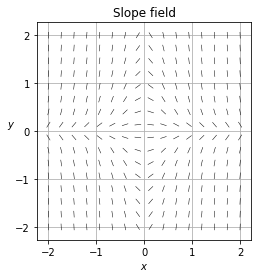

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def f(x,y):
    return -6*x*y

x_range = (-2, 2)
y_range = (-2, 2)
density = 16 # width and height divided into this number of points

width = x_range[1] - x_range[0]
height = y_range[1] - y_range[0]
aspect_ratio = width/height

# decide where to draw the line segments
xs = np.linspace(x_range[0], x_range[1], density)
ys = np.linspace(y_range[0], y_range[1], density)

# decide the length of each line segment
# as a fraction of the total width (or height)
d = 1/density/2

fig, ax = plt.subplots()
ax.set_aspect(aspect_ratio)
plt.title('Slope field')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

for x in xs:
    for y in ys:
        try:
            m = f(x, y)
        
            # length of each line segment computed so as to make
            # all segments visually of equal length
            l = d / math.sqrt((1/width**2+m**2/height**2)/(1+m**2))
        
            x0 = x - l * math.sqrt(1/(1+m**2)) / 2
            x1 = x + l * math.sqrt(1/(1+m**2)) / 2
            y0 = y + m * (x0 - x)
            y1 = y + m * (x1 - x)
            
            plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 0.5)
            
        except ZeroDivisionError:
            pass

plt.show()

**Example 8.4.** We are now in a position to solve the (previously seen) population growth equation and Newtonian cooling equation.